# Introduction to PyTorch

https://pytorch.org/tutorials/beginner/basics/intro.html

- [0. Quickstart](#0.-Quickstart)
- [1. Tensors](#1.-Tensors)




## 0. Quickstart

### Working with data

PyTorch has two [primitives to work with data](https://pytorch.org/docs/stable/data.html): 
- `torch.utils.data.Dataset` stores the samples and their corresponding labels.
- `torch.utils.data.DataLoader` wraps an iterable around the Dataset.

In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Compose
import matplotlib.pyplot as plt

PyTorch offers domain-specific libraries such as TorchText, TorchVision, and TorchAudio, all of which include datasets.

The `torchvision.datasets` module contains `Dataset` objects for many real-world vision data like CIFAR, COCO [(full list here)](https://pytorch.org/vision/stable/datasets.html). In this tutorial, we use the FashionMNIST dataset. Every TorchVision Dataset includes two arguments: `transform` and `target_transform` to modify the samples and labels respectively.

In [2]:
%%capture
# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

We pass the `Dataset` as an argument to `DataLoader`. This wraps an iterable over our dataset, and supports automatic batching, sampling, shuffling and multiprocess data loading. Here we define a batch size of 64, i.e. each element in the dataloader iterable will return a batch of 64 features and labels.

In [3]:
batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print("Shape of X [N, C, H, W]: ", X.shape)
    print("Shape of y: ", y.shape, y.dtype)
    break

Shape of X [N, C, H, W]:  torch.Size([64, 1, 28, 28])
Shape of y:  torch.Size([64]) torch.int64


## 1. Tensors

Tensors are a specialized data structure that are very similar to arrays and matrices. In PyTorch, we use tensors to encode the inputs and outputs of a model, as well as the model's parameters.

Tensors are similar to [NumPy’s](https://numpy.org/) ndarrays, except that tensors can run on GPUs or other hardware accelerators. In fact, tensors and NumPy arrays can often share the same underlying memory, eliminating the need to copy data (see [Bridge with NumPy](https://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html#bridge-to-np-label)). Tensors are also optimized for automatic differentiation (we’ll see more about that later in the [Autograd](https://pytorch.org/tutorials/beginner/basics/autogradqs_tutorial.html) section). If you're familiar with ndarrays, you'll be right at home with the Tensor API. If not, follow along!

In [4]:
import numpy as np

### 1.1. Initializing a Tensor

#### Directly from data

In [5]:
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)

#### From a Numpy array

[Bridge with NumPy](https://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html#bridge-to-np-label)

In [6]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

#### From another tensor

The new tensor retains the properties (shape, datatype) of the argument tensor, unless explicitly overridden.

In [7]:
x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.4589, 0.7137],
        [0.9210, 0.9130]]) 



#### With random or constant values

In [8]:
# shape is a tuple of tensor dimensions. In the functions below, 
# it determines the dimensionality of the output tensor.

shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.2860, 0.6991, 0.2100],
        [0.1903, 0.8299, 0.9654]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


### 1.2 Attributes of a Tensor

Tensor attributes describe their shape, datatype, and the device on which they are stored.

In [9]:
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


### 1.3 Operations on Tensors

Over 100 tensor operations, including arithmetic, linear algebra, matrix manipulation (transposing, indexing, slicing), sampling and more are comprehensively described [here](https://pytorch.org/docs/stable/torch.html).

By default, tensors are created on the CPU. We need to explicitly move tensors to the GPU using `.to` method (after checking for GPU availability). Keep in mind that copying large tensors across devices can be expensive in terms of time and memory!

In [10]:
# We move our tensor to the GPU if available
if torch.cuda.is_available():
    tensor = tensor.to('cuda')
    
tensor.device

device(type='cuda', index=0)

#### Standard numpy-like indexing and slicing:

In [11]:
tensor = torch.ones(4, 4)
print('First row: ', tensor[0])
print('First column: ', tensor[:, 0])
print('Last column:', tensor[..., -1])
tensor[:,1] = 0
print(tensor)

First row:  tensor([1., 1., 1., 1.])
First column:  tensor([1., 1., 1., 1.])
Last column: tensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


#### Joining tensors

[`torch.cat`](https://pytorch.org/docs/stable/generated/torch.cat.html): concatenate a sequence of tensors along a __given__ dimension.  
[`torch.stack`](https://pytorch.org/docs/stable/generated/torch.stack.html): concatenates sequence of tensors along a __new__ dimension.

In [12]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)
t2 = torch.stack([tensor, tensor, tensor], dim=1)
print(t1)
print(t2)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])
tensor([[[1., 0., 1., 1.],
         [1., 0., 1., 1.],
         [1., 0., 1., 1.]],

        [[1., 0., 1., 1.],
         [1., 0., 1., 1.],
         [1., 0., 1., 1.]],

        [[1., 0., 1., 1.],
         [1., 0., 1., 1.],
         [1., 0., 1., 1.]],

        [[1., 0., 1., 1.],
         [1., 0., 1., 1.],
         [1., 0., 1., 1.]]])


In [13]:
test = torch.tensor([[1, 2, 3], [4, 5, 6]])
print(torch.stack([test, test, test, test], dim=0))
print(torch.stack([test, test, test, test], dim=1))
print(torch.stack([test, test, test, test], dim=2))

tensor([[[1, 2, 3],
         [4, 5, 6]],

        [[1, 2, 3],
         [4, 5, 6]],

        [[1, 2, 3],
         [4, 5, 6]],

        [[1, 2, 3],
         [4, 5, 6]]])
tensor([[[1, 2, 3],
         [1, 2, 3],
         [1, 2, 3],
         [1, 2, 3]],

        [[4, 5, 6],
         [4, 5, 6],
         [4, 5, 6],
         [4, 5, 6]]])
tensor([[[1, 1, 1, 1],
         [2, 2, 2, 2],
         [3, 3, 3, 3]],

        [[4, 4, 4, 4],
         [5, 5, 5, 5],
         [6, 6, 6, 6]]])


#### Arithmetic operations

In [14]:
# This computes the matrix multiplication between two tensors. y1, y2, y3 will have the same value
y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)

y3 = torch.rand_like(tensor)
torch.matmul(tensor, tensor.T, out=y3)


# This computes the element-wise product. z1, z2, z3 will have the same value
z1 = tensor * tensor
z2 = tensor.mul(tensor)

z3 = torch.rand_like(tensor)
torch.mul(tensor, tensor, out=z3)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])

#### Single-element tensors

If you have a one-element tensor, for example by aggregating all values of a tensor into one value, you can convert it to a Python numerical value using `item()`:

In [15]:
agg = tensor.sum()
agg_item = agg.item()
print(agg_item, type(agg_item))

12.0 <class 'float'>


#### In-place operations 
Operations that store the result into the operand are called in-place. They are denoted by a `_` suffix. For example: `x.copy_(y)`, `x.t_()`, will change `x`.
- `torch.t(input)` Expects input to be <= 2-D tensor and transposes dimensions 0 and 1. 0-D and 1-D tensors are returned as is. When input is a 2-D tensor this is equivalent to transpose(input, 0, 1).

In [16]:
print(tensor, "\n")
tensor.add_(5)
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])


<div class="alert alert-info"><h4>Note</h4><p>In-place operations save some memory, but can be problematic when computing derivatives because of an immediate loss
     of history. Hence, their use is discouraged.</p></div>

### 1.4 Bridge with NumPy

Tensors on the CPU and NumPy arrays can share their underlying memory locations, and changing one will change the other.

#### Tensor to NumPy array

In [17]:
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]
t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


#### NumPy array to Tensor

In [18]:
n = np.ones(5)
t = torch.from_numpy(n)

# Changes in the NumPy array reflects in the tensor.

np.add(n, 1, out=n)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
n: [2. 2. 2. 2. 2.]


## 3. Datasets & DataLoaders

Code for processing data samples can get messy and hard to maintain; we ideally want our dataset code to be decoupled from our model training code for better readability and modularity. PyTorch provides two data primitives: `torch.utils.data.DataLoader` and `torch.utils.data.Dataset` that allow you to use pre-loaded datasets as well as your own data. `Dataset` stores the samples and their corresponding labels, and `DataLoader` wraps an iterable around the `Dataset` to enable easy access to the samples.

PyTorch domain libraries provide a number of pre-loaded datasets (such as FashionMNIST) that subclass `torch.utils.data.Dataset` and implement functions specific to the particular data. They can be used to prototype and benchmark your model. You can find them here: 
- `torchvision`, [Image Datasets](https://pytorch.org/vision/stable/datasets.html)
- `torchtext`, [Text Datasets](https://pytorch.org/text/stable/datasets.html)
- `torchaudio`, [Audio Datasets](https://pytorch.org/audio/stable/datasets.html)

### 3.1 Loading a Dataset

Fashion-MNIST is a dataset of Zalando`s article images consisting of 60,000 training examples and 10,000 test examples. Each example comprises a 28×28 grayscale image and an associated label from one of 10 classes.

Parameters:
- `root` is the path where the train/test data is stored
- `train` specifies training or test dataset,
- `download=True` downloads the data from the internet if it's not available at `root`.
- `transform` and `target_transform` specify the feature and label transformations.

In [19]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

### 3.2 Iterating and Visualizing the Dataset

We can index Datasets manually like a list: training_data[index]. We use matplotlib to visualize some samples in our training data.

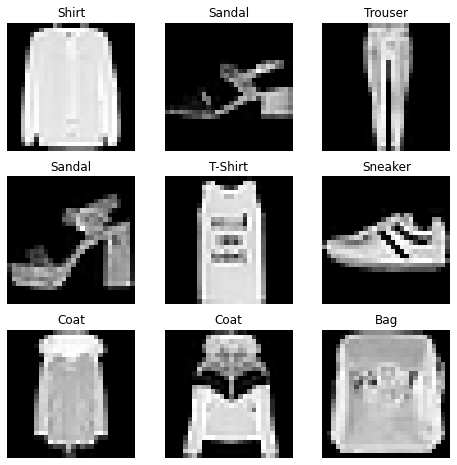

In [21]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()